# Introduction

Cyclistic is a fictional bike-share company in Chicago. It has more than 5,800 classic and electric bikes that are geotracked and locked into a network of 692 stations. The bikes can be unlocked from one station and returned to any other station in the system anytime. The company has two types of users: casual riders and annual members. The director of marketing believes that the company's future success depends on maximizing the number of annual memberships. Therefore, our business task at hand is to first understand **how casual riders and annual members use Cyclistic bikes differently**. Then from these insights, the next step would be to design a marketing strategy to convert casual riders into annual members.

The dataset consist of 12 csv files, one for each month. Each csv file has 7 character columns: `ride_id` - a unique identifier for each ride, `rideable_type` - the type of bike (classic or electric), `start_station_name`, `start_station_id`, `end_station_name`, `end_station_id`, `member_casual` - the user type, 4 numeric columns: `start_lat`, `start_lng` - the start station coordinates, `end_lat`, `end_lng` - the end station coordinates, and 2 date-time columns: `started_at` and `ended_at` - starting and ending time of a ride.

# Data Cleaning & Preparation

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# full.names=TRUE - ensures that the returned file names include the full path
# recursive=TRUE - allows searching in all subdirectories 
file_paths <- list.files('/kaggle/input/divvy-cyclistic-data-2024', pattern='*.csv', full.names=TRUE, recursive=TRUE)
print(file_paths)

 [1] "/kaggle/input/divvy-cyclistic-data-2024/202401-divvy-tripdata/202401-divvy-tripdata.csv"
 [2] "/kaggle/input/divvy-cyclistic-data-2024/202402-divvy-tripdata/202402-divvy-tripdata.csv"
 [3] "/kaggle/input/divvy-cyclistic-data-2024/202403-divvy-tripdata/202403-divvy-tripdata.csv"
 [4] "/kaggle/input/divvy-cyclistic-data-2024/202404-divvy-tripdata/202404-divvy-tripdata.csv"
 [5] "/kaggle/input/divvy-cyclistic-data-2024/202405-divvy-tripdata/202405-divvy-tripdata.csv"
 [6] "/kaggle/input/divvy-cyclistic-data-2024/202406-divvy-tripdata/202406-divvy-tripdata.csv"
 [7] "/kaggle/input/divvy-cyclistic-data-2024/202407-divvy-tripdata/202407-divvy-tripdata.csv"
 [8] "/kaggle/input/divvy-cyclistic-data-2024/202408-divvy-tripdata/202408-divvy-tripdata.csv"
 [9] "/kaggle/input/divvy-cyclistic-data-2024/202409-divvy-tripdata/202409-divvy-tripdata.csv"
[10] "/kaggle/input/divvy-cyclistic-data-2024/202410-divvy-tripdata/202410-divvy-tripdata.csv"
[11] "/kaggle/input/divvy-cyclistic-data-2024/2024

Create a list to hold all 12 data frames.

In [3]:
data_list <- lapply(file_paths, read_csv)

Rows: 144873 Columns: 13


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 223164 Columns: 13


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 301687 Columns: 13


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 415025 Columns: 13


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 609493 Columns: 13


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 710721 Columns: 13


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 748962 Columns: 13


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 755639 Columns: 13


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 821276 Columns: 13


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 616281 Columns: 13


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 335075 Columns: 13


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 178372 Columns: 13


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Customize the name of each data frame.

In [4]:
custom_names <- c('data01', 'data02', 'data03', 'data04', 'data05', 'data06', 'data07', 'data08', 'data09', 'data10', 'data11', 'data12')
names(data_list) <- custom_names

Inspect the structure of the first data frame.

In [5]:
glimpse(data_list[['data01']])

Rows: 144,873
Columns: 13
$ ride_id            <chr> "C1D650626C8C899A", "EECD38BDB25BFCB0", "F4A9CE7806…
$ rideable_type      <chr> "electric_bike", "electric_bike", "electric_bike", …
$ started_at         <dttm> 2024-01-12 15:30:27, 2024-01-08 15:45:46, 2024-01-…
$ ended_at           <dttm> 2024-01-12 15:37:59, 2024-01-08 15:52:59, 2024-01-…
$ start_station_name <chr> "Wells St & Elm St", "Wells St & Elm St", "Wells St…
$ start_station_id   <chr> "KA1504000135", "KA1504000135", "KA1504000135", "TA…
$ end_station_name   <chr> "Kingsbury St & Kinzie St", "Kingsbury St & Kinzie …
$ end_station_id     <chr> "KA1503000043", "KA1503000043", "KA1503000043", "13…
$ start_lat          <dbl> 41.90327, 41.90294, 41.90295, 41.88430, 41.94880, 4…
$ start_lng          <dbl> -87.63474, -87.63444, -87.63447, -87.63396, -87.675…
$ end_lat            <dbl> 41.88918, 41.88918, 41.88918, 41.92182, 41.88918, 4…
$ end_lng            <dbl> -87.63851, -87.63851, -87.63851, -87.64414, -87.638…
$ member_casua

In [6]:
str(data_list[['data01']])

spc_tbl_ [144,873 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:144873] "C1D650626C8C899A" "EECD38BDB25BFCB0" "F4A9CE78061F17F7" "0A0D9E15EE50B171" ...
 $ rideable_type     : chr [1:144873] "electric_bike" "electric_bike" "electric_bike" "classic_bike" ...
 $ started_at        : POSIXct[1:144873], format: "2024-01-12 15:30:27" "2024-01-08 15:45:46" ...
 $ ended_at          : POSIXct[1:144873], format: "2024-01-12 15:37:59" "2024-01-08 15:52:59" ...
 $ start_station_name: chr [1:144873] "Wells St & Elm St" "Wells St & Elm St" "Wells St & Elm St" "Wells St & Randolph St" ...
 $ start_station_id  : chr [1:144873] "KA1504000135" "KA1504000135" "KA1504000135" "TA1305000030" ...
 $ end_station_name  : chr [1:144873] "Kingsbury St & Kinzie St" "Kingsbury St & Kinzie St" "Kingsbury St & Kinzie St" "Larrabee St & Webster Ave" ...
 $ end_station_id    : chr [1:144873] "KA1503000043" "KA1503000043" "KA1503000043" "13193" ...
 $ start_lat         : num [1:144873] 41.9

Have a look at the first 3 rows of the first data frame.

In [7]:
head(data_list[['data01']], 3)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
C1D650626C8C899A,electric_bike,2024-01-12 15:30:27,2024-01-12 15:37:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.90327,-87.63474,41.88918,-87.63851,member
EECD38BDB25BFCB0,electric_bike,2024-01-08 15:45:46,2024-01-08 15:52:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.90294,-87.63444,41.88918,-87.63851,member
F4A9CE78061F17F7,electric_bike,2024-01-27 12:27:19,2024-01-27 12:35:19,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.90295,-87.63447,41.88918,-87.63851,member


Remove duplicate entries.

In [8]:
data_list <- lapply(data_list, function(data) distinct(data)) 

Normally, we would expect that for each unique start station coordinates (`start_lat`, `start_lng`) there is a unique station name and ID (`start_station_name`, `start_station_id`). Let's check if there are non-unique correspondences.

In [9]:
non_unique_pair_check_start <- function(data){
    data %>%
    group_by(start_lat, start_lng) %>%
    summarize(n_unique_names=n_distinct(start_station_name), n_unique_ids=n_distinct(start_station_id), .groups='drop') %>%
    filter(n_unique_names > 1 | n_unique_ids > 1)
}

non_unique_pairs_start <- lapply(data_list, non_unique_pair_check_start)

A quick look shows that there are coordinates with multiple names and IDs.

In [10]:
non_unique_pairs_start

start_lat,start_lng,n_unique_names,n_unique_ids
<dbl>,<dbl>,<int>,<int>
41.76437,-87.60079,2,2
41.79980,-87.58385,5,5
41.80455,-87.73565,7,7
41.84263,-87.70415,8,8
41.87874,-87.63232,2,2
41.87938,-87.63148,2,2
41.88327,-87.62938,2,2
41.89257,-87.63115,2,2
41.89754,-87.64283,3,3


The same is true for the end station.

In [11]:
non_unique_pair_check_end <- function(data){
    data %>%
    group_by(end_lat, end_lng) %>%
    summarize(n_unique_names=n_distinct(end_station_name), n_unique_ids=n_distinct(end_station_id), .groups='drop') %>%
    filter(n_unique_names > 1 | n_unique_ids > 1)
}

non_unique_pairs_end <- lapply(data_list, non_unique_pair_check_end)

In [12]:
non_unique_pairs_end

end_lat,end_lng,n_unique_names,n_unique_ids
<dbl>,<dbl>,<int>,<int>
41.93242,-87.6527,2,2
end_lat,end_lng,n_unique_names,n_unique_ids
<dbl>,<dbl>,<int>,<int>
41.93242,-87.65270,2,2
41.97871,-87.75552,2,2
end_lat,end_lng,n_unique_names,n_unique_ids
<dbl>,<dbl>,<int>,<int>
41.91417,-87.71676,2,2
41.91711,-87.71022,2,2


Count the total number of missing values in each column for each data frame in the list.

In [13]:
calculate_missing_values <- function(data) {
    missing_values <- sapply(data, function(x) sum(is.na(x)))
    tibble(data_column=names(missing_values), count=missing_values)
}

missing_values_list <- lapply(data_list, calculate_missing_values)                           

A look at the first data frame's missing values shows that there are missing values in `start_station_name`, `start_station_id`, `end_station_name`, `end_station_id`, `end_lat` and `end_lng` columns, although the number of missing values in `end_lat` and `end_lng` is quite less. The same pattern of missing values is true for the other data frames in the list.

In [14]:
missing_values_list[['data01']]

data_column,count
<chr>,<int>
ride_id,0
rideable_type,0
started_at,0
ended_at,0
start_station_name,19165
start_station_id,19165
end_station_name,20749
end_station_id,20749
start_lat,0


To solve the before mentioned non-unique correspondence, we could choose the most frequently occuring station name and ID for each coodinate pair, and replace the multiple station names and IDs with it. 

If there are coordinates with corresponding missing names and IDs which have been matched with names and IDs in other rows of the data frame, we could fill the missing names and IDs with the most frequently occuring station names and IDs for that coordinates. This is what the next functions do for the start and the end station.

In [15]:
fix_and_fill_start <- function(data) {
    lookup_table <- data %>%
                    group_by(start_lat, start_lng) %>%
                    count(start_station_name, start_station_id) %>%
                    arrange(desc(n)) %>%
                    slice(1) %>%
                    select(start_lat, start_lng, start_station_name, start_station_id)
    data <- data %>%
            left_join(lookup_table, by=c('start_lat', 'start_lng'), suffix=c('', '_fix')) %>%
            mutate(start_station_name=ifelse(start_station_name!=start_station_name_fix | is.na(start_station_name), start_station_name_fix, start_station_name),
                   start_station_id=ifelse(start_station_id!=start_station_id_fix | is.na(start_station_id), start_station_id_fix, start_station_id)) %>%
            select(-start_station_name_fix, -start_station_id_fix)
    return(data)
}

data_list <- lapply(data_list, fix_and_fill_start)

In [16]:
fix_and_fill_end <- function(data) {
    lookup_table <- data %>%
                    group_by(end_lat, end_lng) %>%
                    count(end_station_name, end_station_id) %>%
                    arrange(desc(n)) %>%
                    slice(1) %>%
                    select(end_lat, end_lng, end_station_name, end_station_id)
    data <- data %>%
            left_join(lookup_table, by=c('end_lat', 'end_lng'), suffix=c('', '_fix')) %>%
            mutate(end_station_name=ifelse(end_station_name!=end_station_name_fix | is.na(end_station_name), end_station_name_fix, end_station_name),
                   end_station_id=ifelse(end_station_id!=end_station_id_fix, end_station_id_fix, end_station_id)) %>%
            select(-end_station_name_fix, -end_station_id_fix)
    return(data)
}

data_list <- lapply(data_list, fix_and_fill_end)

A check shows that the problem of mutliple corresponde is solved.

In [17]:
non_unique_pairs_start <- lapply(data_list, non_unique_pair_check_start)

# sapply() - applies func to each element of a vector, list, or data frame and simplifies the output to the most basic possible structure
check_empty <- sapply(non_unique_pairs_start, function(data) nrow(data)==0)
if (all(check_empty)) {
    cat('All data frames in non_unique_pairs_start have 0 rows.')
} else {
    cat('Some data frames in non_unique_pairs_start have non-zero rows.')
}               

All data frames in non_unique_pairs_start have 0 rows.

In [18]:
non_unique_pairs_end <- lapply(data_list, non_unique_pair_check_end)

check_empty <- sapply(non_unique_pairs_end, function(data) nrow(data)==0)
if (all(check_empty)) {
    cat('All data frames in non_unique_pairs_end have 0 rows.')
} else {
    cat('Some data frames in non_unique_pairs_end have non-zero rows.')
}               

All data frames in non_unique_pairs_end have 0 rows.

Drop the rows with missing names and IDs whose coordinates didn't match elsewhere in the data frame.

In [19]:
drop_missing_start <- function(data) {
    data <- data %>%
            filter(!is.na(start_station_name) & !is.na(start_station_id))
}

data_list <- lapply(data_list, drop_missing_start)

In [20]:
drop_missing_end <- function(data) {
    data <- data %>%
            filter(!is.na(end_station_name) & !is.na(end_station_id))
}

data_list <- lapply(data_list, drop_missing_end)

Check if there are any missing values left.

In [21]:
any_missing <- sapply(data_list, function(data) any(is.na(data)))

if (all(!any_missing)) {
    cat('There are no missing values left.')
} else {
    cat('There are some missing values left.')
}                     

There are no missing values left.

Sort each data frame in the list by the date-time the ride started at in ascending order.

In [22]:
data_list <- lapply(data_list, function(data) {
    data <- data %>%
            arrange(started_at)
})

Check if there are rows with date-time started greater than date-time ended.

In [23]:
invalid_rows_count <- lapply(data_list, function(data) {
    sum(!(data$started_at < data$ended_at))
})

invalid_rows_count

$data01
[1] 20

$data02
[1] 15

$data03
[1] 41

$data04
[1] 57

$data05
[1] 54

$data06
[1] 0

$data07
[1] 0

$data08
[1] 0

$data09
[1] 0

$data10
[1] 0

$data11
[1] 26

$data12
[1] 0

Select only rows with date-time started smaller than date-time ended.

In [24]:
data_list <- lapply(data_list, function(data) {
    data[data$started_at < data$ended_at, ]
})

Make sure that `started_at` and `ended_at` refers to the correct month.

In [25]:
char_vec <- c('01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12')

for (i in 1:12) {
    # format(..., '%m') - extracts the month from the date-time
    data_list[[i]] <- data_list[[i]][format(as.POSIXct(data_list[[i]]$started_at, format='%Y-%m-%d %H:%M:%S'), '%m') == char_vec[i], ]
    data_list[[i]] <- data_list[[i]][format(as.POSIXct(data_list[[i]]$ended_at, format='%Y-%m-%d %H:%M:%S'), '%m') %in% c(char_vec[i], char_vec[i+1]), ]
}

Select reasonable values for the start and end coordinates.

In [26]:
data_list <- lapply(data_list, function(data) {
    data[
        data$start_lat >= -90 & data$start_lat <= 90 &
        data$end_lat >= -90 & data$end_lat <= 90 &
        data$start_lng >= -180 & data$start_lng <= 180 &
        data$end_lng >= -180 & data$end_lng <= 180, 
    ]
})

Make sure that `rideable_type` contains only classic_bike and electric bike.

In [27]:
data_list <- lapply(data_list, function(data) {
    data[data$rideable_type %in% c('classic_bike', 'electric_bike'), ]
})

Make sure that `member_casual` contains only member and casual types of user.

In [28]:
data_list <- lapply(data_list, function(data) {
    data[data$member_casual %in% c('member', 'casual'), ]
})

Combine the data frames in the list into one, and map the month to each data frame by creating a new column `month`.

In [29]:
months = c("January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December")

data_combined <- bind_rows(
    lapply(seq_along(data_list), function(i) {
        data_list[[i]] %>%
        mutate(month=months[i])  # map the month to each dataset
    })
)

To display data in the natural chronological order of months rather than the alphabetical order, we have to convert the character type of `month` column to factor.

In [30]:
# factor - integer vector with labels called levels
data_combined <- data_combined %>%
                 mutate(month=factor(month, levels=months))

# Analysis

Important metrics used: 
* mean ride length - the average duration of all rides in seconds; helps understand typical trip duration for the two type of users, indicating differences in how the bikes are used
* number of rides - total count of rides taken within a specific time period; shows patterns in user activity and helps highlight peak usage times


Plot the rideable type distribution by month. Each month the number of classic bikes outweight the number of electric bikes. The difference between the number of the two type of bikes is least in December.

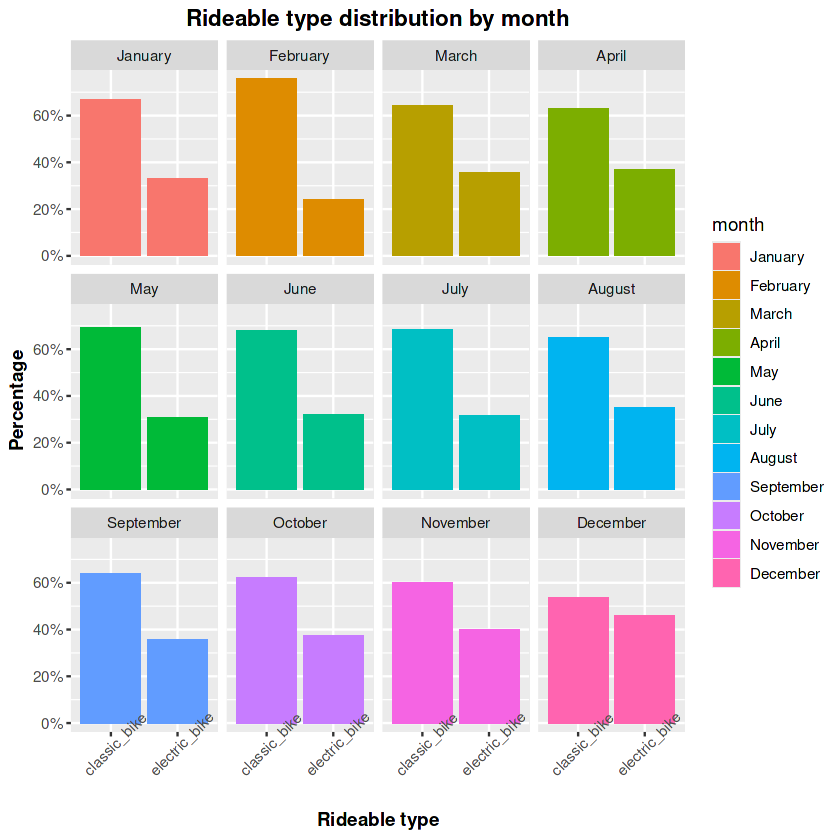

In [31]:
data_combined_rideable_type <- data_combined %>%
                               group_by(month, rideable_type) %>%
                               summarize(count=n(), .groups='drop') %>%
                               group_by(month) %>%
                               mutate(proportion=count/sum(count))

ggplot(data=data_combined_rideable_type) +
    geom_bar(mapping=aes(x=rideable_type, y=proportion, fill=month), stat='identity') +
    scale_y_continuous(labels=scales::percent_format()) +
    labs(title='Rideable type distribution by month', x='Rideable type', y='Percentage') +
    theme(plot.title=element_text(hjust=0.5, face='bold'), axis.text.x=element_text(angle=45), axis.title.x=element_text(face='bold'),
          axis.title.y=element_text(face='bold')) +
    facet_wrap(~month)

Plot the user type distribution by month. Each month, the number of annual members is much greater than the number of casual riders, although the difference is smaller for summer months, showing that casual riders prefer using Cyclistic bikes in the summer.

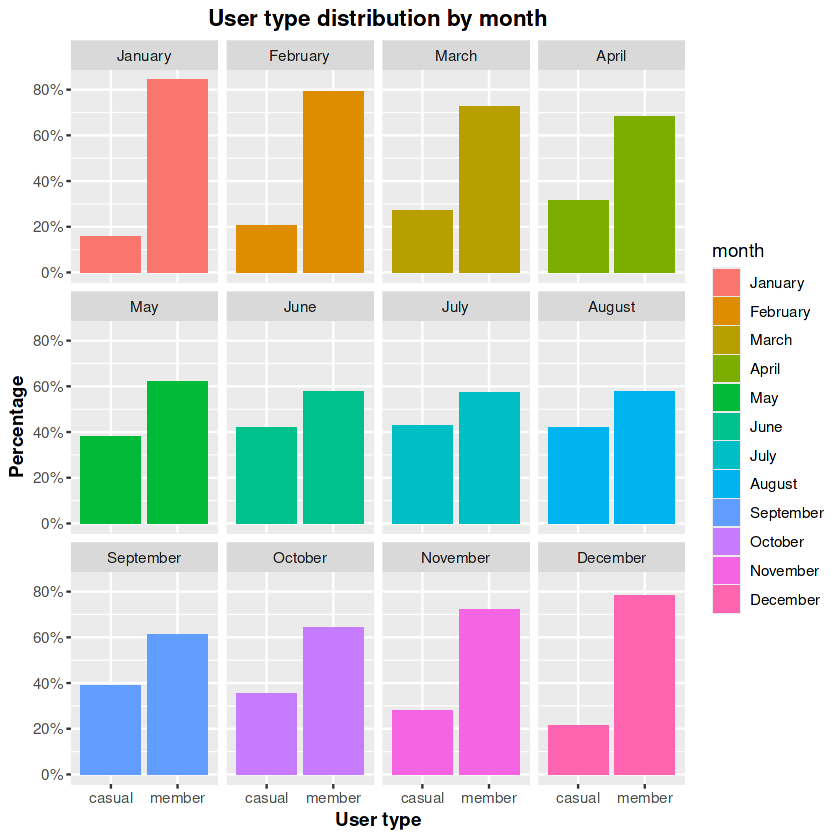

In [32]:
data_combined_member_casual <- data_combined %>%
                               group_by(month, member_casual) %>%
                               summarize(count=n(), .groups='drop') %>%
                               group_by(month) %>%
                               mutate(proportion=count/sum(count))

ggplot(data=data_combined_member_casual) +
    geom_bar(mapping=aes(x=member_casual, y=proportion, fill=month), stat='identity') +
    scale_y_continuous(labels=scales::percent_format()) +
    labs(title='User type distribution by month', x='User type', y='Percentage') +
    theme(plot.title=element_text(hjust=0.5, face='bold'), axis.title.x=element_text(face='bold'), axis.title.y=element_text(face='bold')) +
    facet_wrap(~month)

Create a new column `ride_length` which is the difference between start time and end time. Create another column `day_of_week` for the day of the week the ride took place.

In [33]:
data_combined$ride_length <- as.numeric(difftime(data_combined$ended_at, data_combined$started_at, units='secs'))
data_combined$day_of_week <- weekdays(data_combined$started_at)

Plot the mean ride length by month for annual members and casual riders. The mean ride length is significantly higher for casual riders across all months, especially during the summer. 

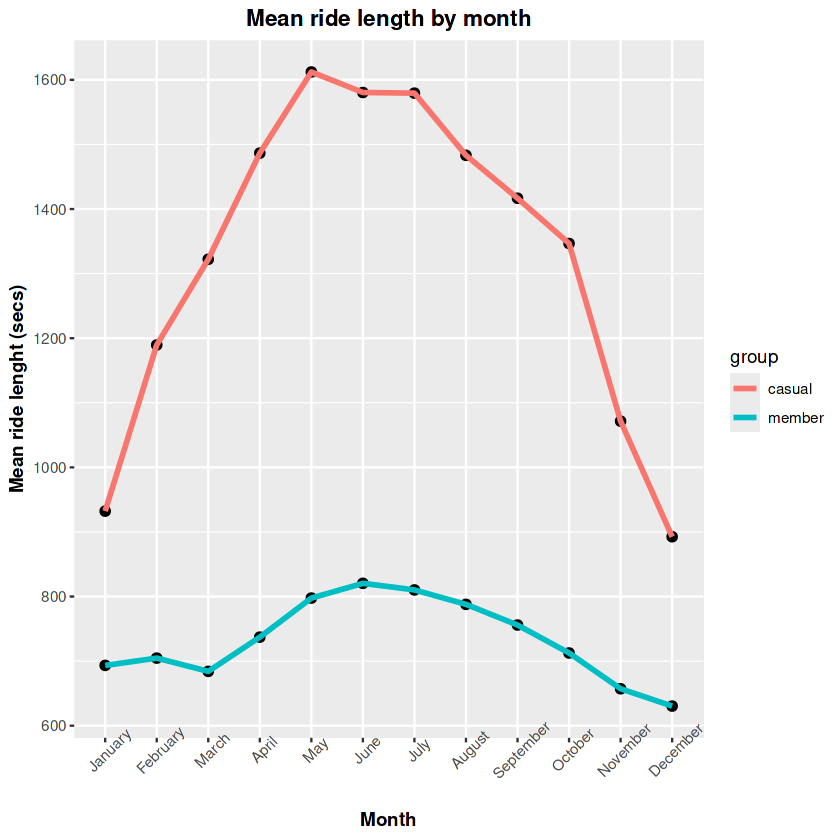

In [34]:
mean_ride_length_month_member <- data_combined %>%
                                 group_by(month) %>%
                                 filter(member_casual=='member') %>%
                                 summarize(mean_ride_length=mean(ride_length), .groups='drop')

mean_ride_length_month_casual <- data_combined %>%
                                 group_by(month) %>%
                                 filter(member_casual=='casual') %>%
                                 summarize(mean_ride_length=mean(ride_length), .groups='drop')

mean_ride_length_month_combined <- bind_rows(
    mean_ride_length_month_member %>% mutate(group='member'),
    mean_ride_length_month_casual %>% mutate(group='casual')
)

ggplot(data=mean_ride_length_month_combined) +
    geom_point(mapping=aes(x=month, y=mean_ride_length), size=2.2) +
    # group=group - ensures the lines are drawn separately for each group
    geom_line(mapping=aes(x=month, y=mean_ride_length, group=group, color=group), linewidth=1.2) +
    labs(title='Mean ride length by month', x='Month', y='Mean ride lenght (secs)') +
    theme(plot.title=element_text(hjust=0.5, face='bold'), axis.title.x=element_text(face='bold'), axis.title.y=element_text(face='bold'),
          axis.text.x=element_text(angle=45))

Plot the mean ride length by day of week. Both annual members and casual riders mean ride length peak on weekends, although the weekend spike is more significant for casual riders.

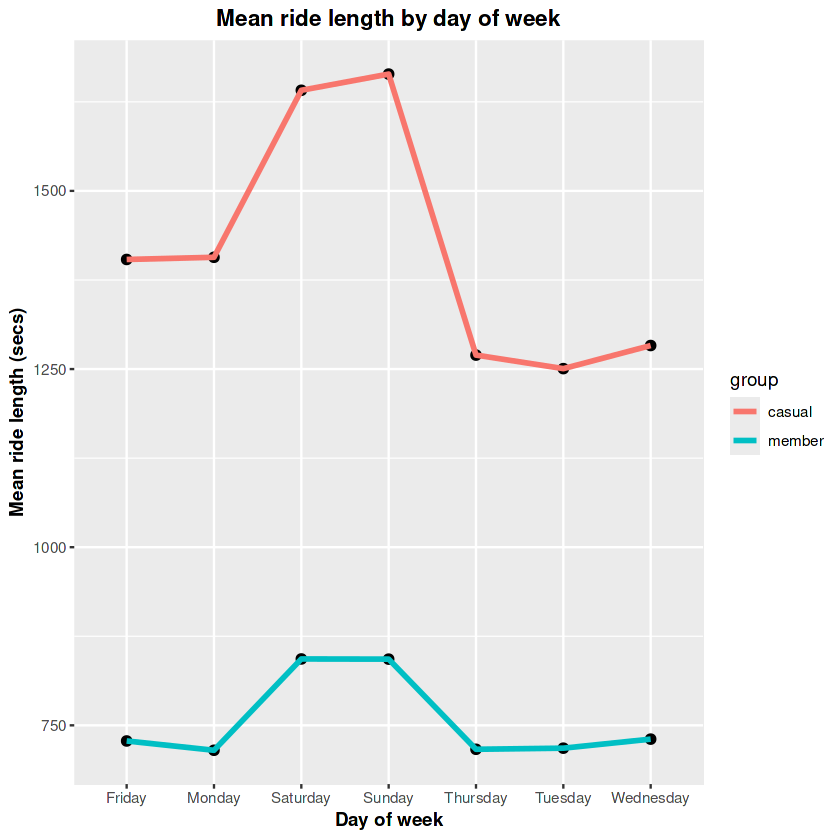

In [35]:
mean_ride_length_weekday_member <- data_combined %>%
                                   group_by(day_of_week) %>%
                                   filter(member_casual=='member') %>%
                                   summarize(mean_ride_length=mean(ride_length), .groups='drop')

mean_ride_length_weekday_casual <- data_combined %>% 
                                   group_by(day_of_week) %>%
                                   filter(member_casual=='casual') %>%
                                   summarize(mean_ride_length=mean(ride_length), .groups='drop')

mean_ride_length_weekday_combined <- bind_rows(
    mean_ride_length_weekday_member %>% mutate(group='member'),
    mean_ride_length_weekday_casual %>% mutate(group='casual')
)

ggplot(data=mean_ride_length_weekday_combined) +
    geom_point(mapping=aes(x=day_of_week, y=mean_ride_length), size=2.2) +
    geom_line(mapping=aes(x=day_of_week, y=mean_ride_length, group=group, color=group), linewidth=1.2) +
    labs(title='Mean ride length by day of week', x='Day of week', y='Mean ride length (secs)') +
    theme(plot.title=element_text(hjust=0.5, face='bold'), axis.title.x=element_text(face='bold'), axis.title.y=element_text(face='bold'))

Plot the number of rides by month. Annual members did more rides than casual riders. It is expected, since the number of annual member is greater. For both users the number of rides peaks at summer months.

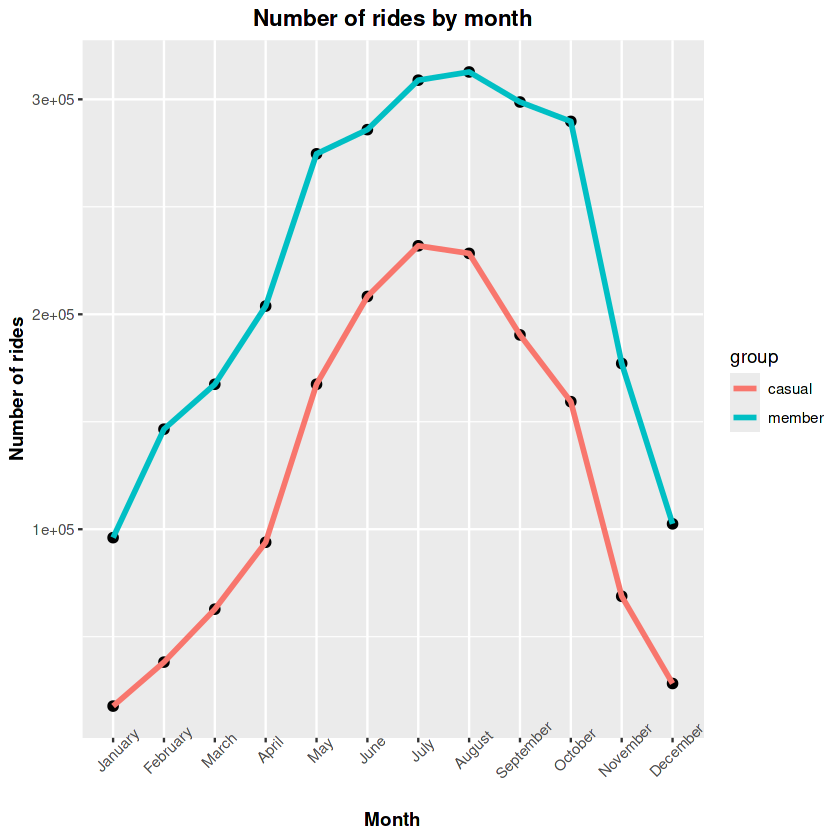

In [36]:
rides_month_member <- data_combined %>%
                      filter(member_casual=='member') %>%
                      group_by(month) %>%
                      summarize(num_rides=n(), .groups='drop')

rides_month_casual <- data_combined %>%
                      filter(member_casual=='casual') %>%
                      group_by(month) %>%
                      summarize(num_rides=n(), .groups='drop')

rides_month_combined <- bind_rows(
    rides_month_member %>% mutate(group='member'),
    rides_month_casual %>% mutate(group='casual')
)

ggplot(data=rides_month_combined) +
    geom_point(mapping=aes(x=month, y=num_rides), size=2.2) +
    geom_line(mapping=aes(x=month, y=num_rides, group=group, color=group), linewidth=1.2) +
    labs(title='Number of rides by month', x='Month', y='Number of rides') +
    theme(plot.title=element_text(hjust=0.5, face='bold'), axis.title.x=element_text(face='bold'), axis.title.y=element_text(face='bold'),
          axis.text.x=element_text(angle=45)) 

Plot the number of rides by day of the week. Annual members use bike more during the week, while casual riders on weekends.

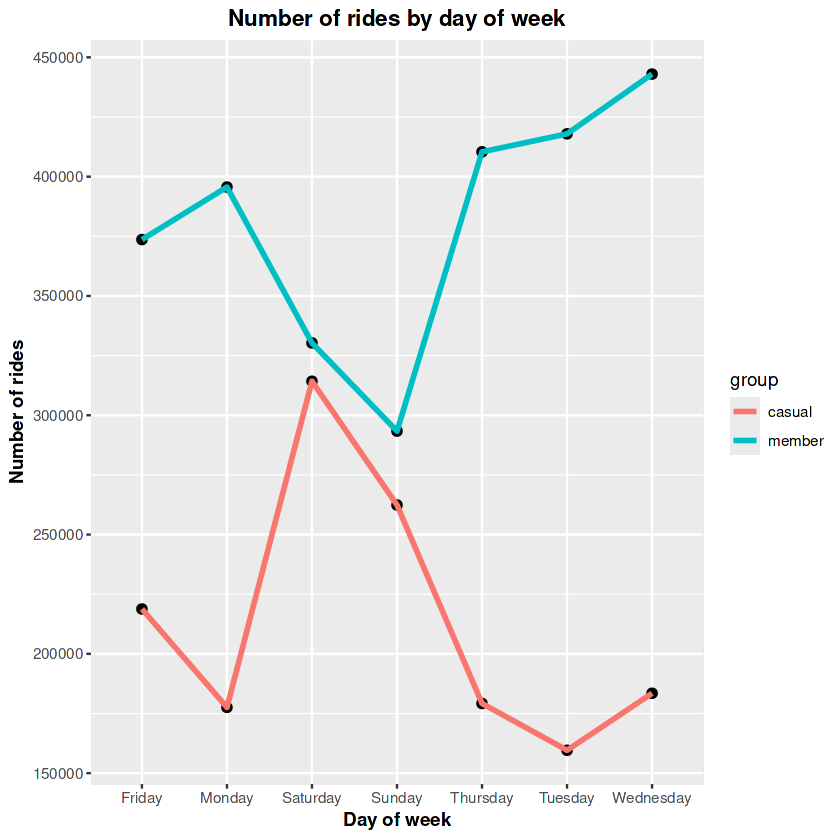

In [37]:
rides_weekday_member <- data_combined %>%
                        filter(member_casual=='member') %>%
                        group_by(day_of_week) %>%
                        summarize(num_rides=n(), .groups='drop')

rides_weekday_casual <- data_combined %>%
                        filter(member_casual=='casual') %>%
                        group_by(day_of_week) %>%
                        summarize(num_rides=n(), .groups='drop')

rides_weekday_combined <- bind_rows(
    rides_weekday_member %>% mutate(group='member'),
    rides_weekday_casual %>% mutate(group='casual')
)

ggplot(data=rides_weekday_combined) +
   geom_point(mapping=aes(x=day_of_week, y=num_rides), size=2.2) +
   geom_line(mapping=aes(x=day_of_week, y=num_rides, group=group, color=group), linewidth=1.2) +
   labs(title='Number of rides by day of week', x='Day of week', y='Number of rides') +
   theme(plot.title=element_text(hjust=0.5, face='bold'), axis.title.x=element_text(face='bold'), axis.title.y=element_text(face='bold')) 

Density plot of ride lengths. Annual members' distribution is shifted towards shorter ride lengths and it is narrower indicating that annual members prefer shorter trips.

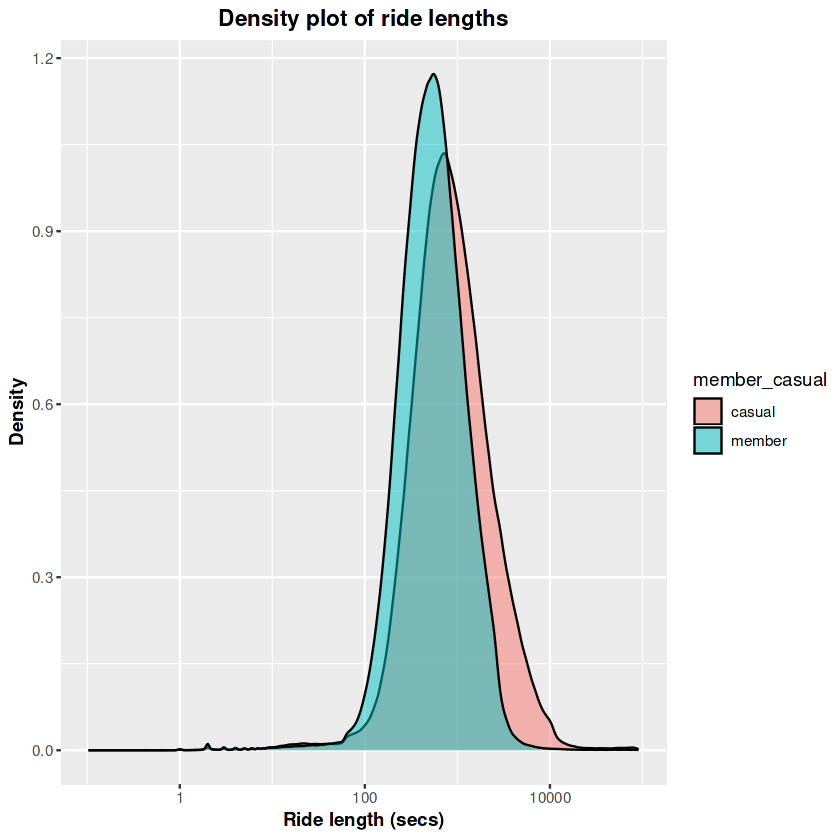

In [38]:
ggplot(data=data_combined) +
    geom_density(mapping=aes(x=ride_length, fill=member_casual), alpha=0.5) +
    scale_x_log10() +
    labs(title='Density plot of ride lengths', x='Ride length (secs)', y='Density') +
    theme(plot.title=element_text(hjust=0.5, face='bold'), axis.title.x=element_text(face='bold'), axis.title.y=element_text(face='bold'))

Extract the hour from the date-time column `started_at` and create a new column `start_hour`. Then plot a histogram displaying the number of rides per start hour. Casual riders peak hour is 5 in the afternoon, while annual members have two peak hours, one at 5 in the afternoon and another smaller peak 8 in the morning. 

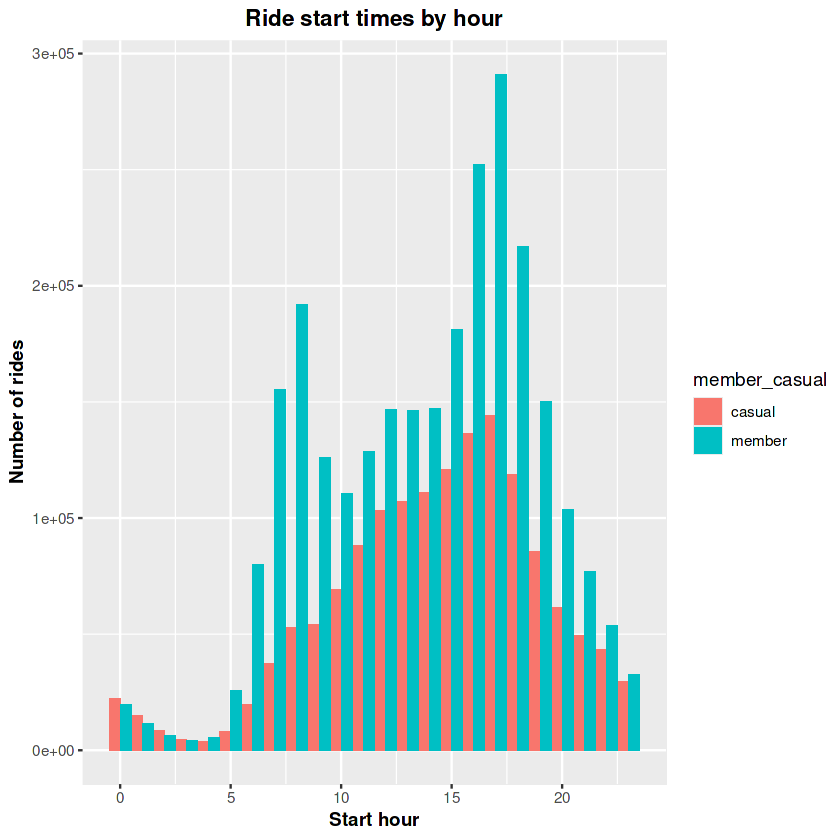

In [39]:
data_combined <- data_combined %>%
                 mutate(start_hour=lubridate::hour(started_at))

ggplot(data=data_combined) +
    geom_histogram(mapping=aes(x=start_hour, fill=member_casual), position='dodge', bins=24) +
    labs(title='Ride start times by hour', x='Start hour', y='Number of rides') +
    theme(plot.title=element_text(hjust=0.5, face='bold'), axis.title.x=element_text(face='bold'), axis.title.y=element_text(face='bold'))

Plot rideable type preference. Both user types prefer classic bikes.

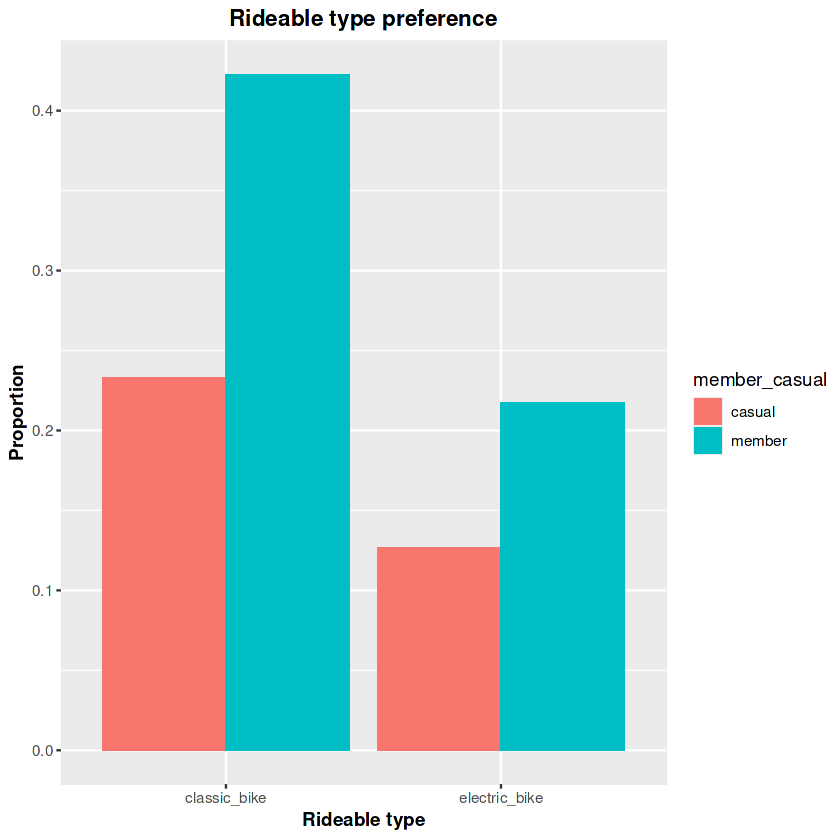

In [40]:
rideable_type_summary <- data_combined %>%
                         group_by(member_casual, rideable_type) %>%
                         summarize(count=n(), .groups='drop') %>%
                         mutate(proportion=count/sum(count))

ggplot(data=rideable_type_summary) +
    geom_bar(mapping=aes(x=rideable_type, y=proportion, fill=member_casual), stat='identity', position='dodge') +
    labs(title='Rideable type preference', x='Rideable type', y='Proportion') +
    theme(plot.title=element_text(hjust=0.5, face='bold'), axis.title.x=element_text(face='bold'), axis.title.y=element_text(face='bold')) 

Create a new column `season` and plot seasonal trends in bike usage. Both user types tend to use bikes more during the summer, however in other seasons the number of rides by casual riders decreases substantially more than the descrease observed among annual members.

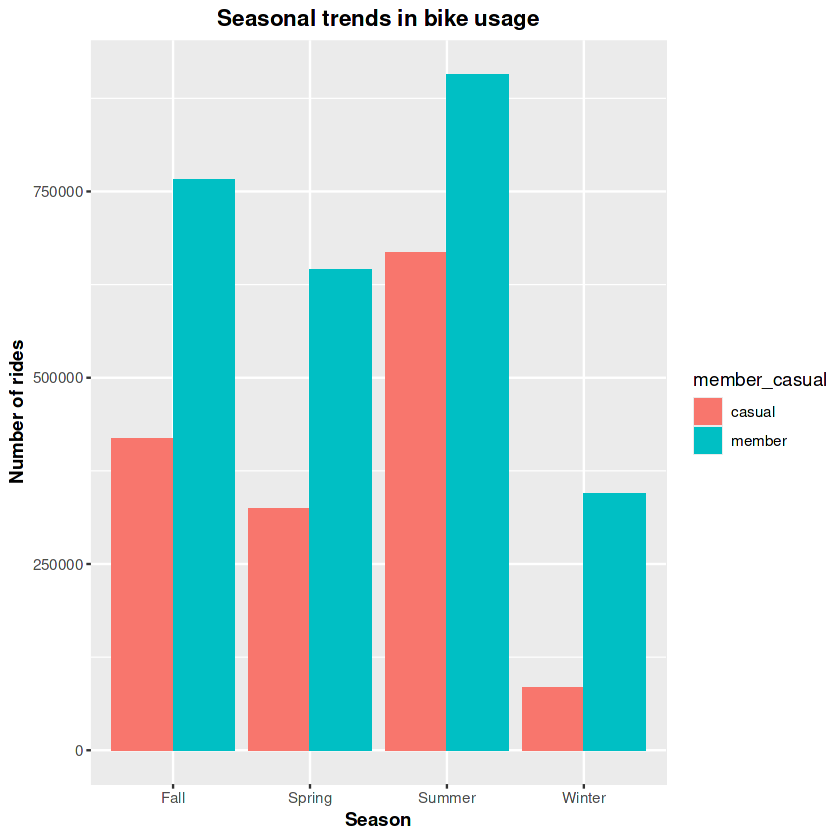

In [41]:
data_combined <- data_combined %>%
                 mutate(season=case_when(
                     month %in% c('December', 'January', 'February') ~ 'Winter',
                     month %in% c('March', 'April', 'May') ~ 'Spring',
                     month %in% c('June', 'July', 'August') ~ 'Summer',
                     month %in% c('September', 'October', 'November') ~ 'Fall'
                 ))

seasonal_data <- data_combined %>%
                 group_by(season, member_casual) %>%
                 summarize(num_rides=n(), .groups='drop')

ggplot(data=seasonal_data) +
    geom_bar(mapping=aes(x=season, y=num_rides, fill=member_casual), stat='identity', position='dodge') +
    labs(title='Seasonal trends in bike usage', x='Season', y='Number of rides') +
    theme(plot.title=element_text(hjust=0.5, face='bold'), axis.title.x=element_text(face='bold'), axis.title.y=element_text(face='bold'))

Create a new column `distance` which the distance of each ride in meters.

In [42]:
data_combined <- data_combined %>%
                 mutate(distance=geosphere::distHaversine(
                     cbind(start_lat, start_lng),
                     cbind(end_lat, end_lng)
                 ))

Plot distance boxplot per season. The mean value, the first quantile and third quantile are not significantly different for both user types. It's not unreasonable, since the mean ride length (ride time on average) for casual riders is greater, while the number of rides for casual riders is less. 

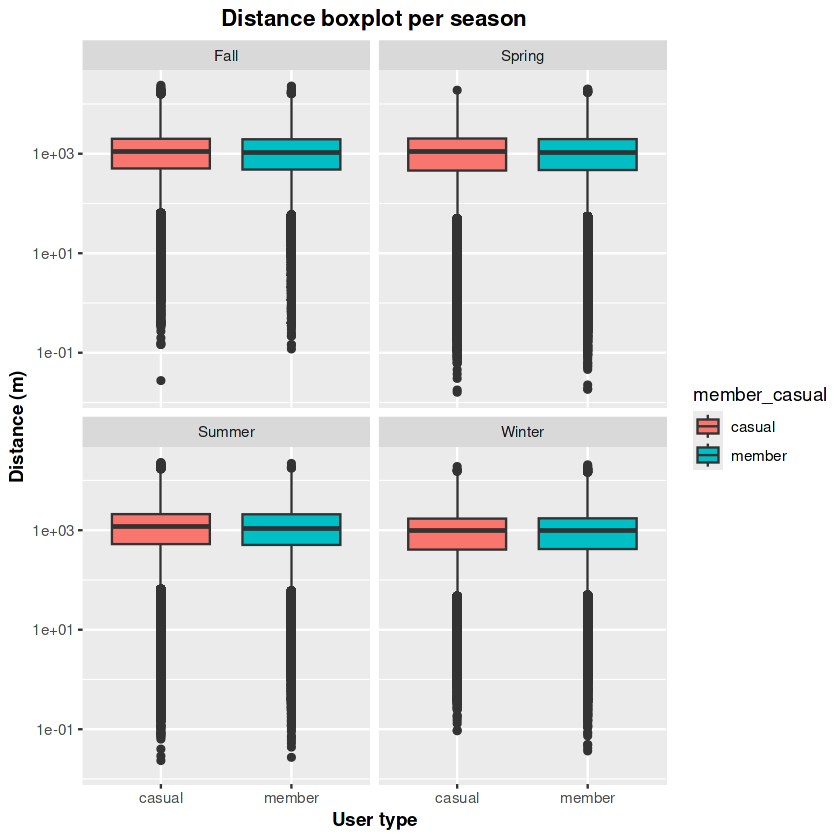

In [43]:
distance_data <- data_combined %>%
                 filter(distance > 0)

ggplot(data=distance_data) +
   geom_boxplot(mapping=aes(x=member_casual, y=distance, fill=member_casual)) +
   scale_y_log10() + 
   labs(title='Distance boxplot per season', x='User type', y='Distance (m)') +
   theme(plot.title=element_text(hjust=0.5, face='bold'), axis.title.x=element_text(face='bold'), axis.title.y=element_text(face='bold')) +
   facet_wrap(~season)

Finally, plot the top 7 start stations for each user type.

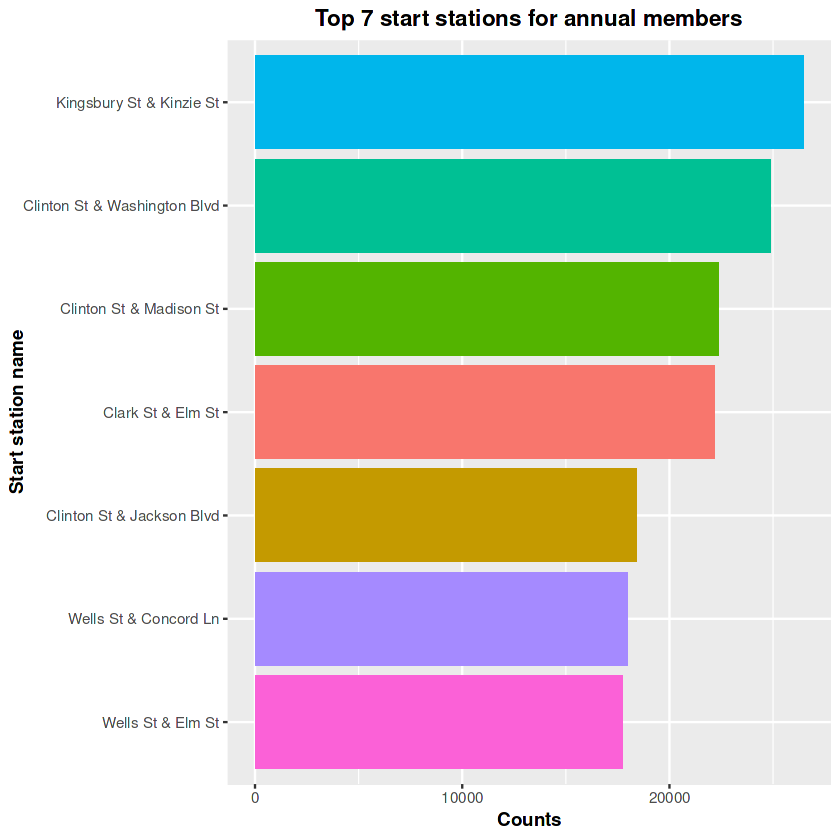

In [44]:
top_start_stations_member <- data_combined %>%
                             filter(member_casual=='member') %>%
                             count(start_station_name, sort=TRUE) %>%
                             slice_max(n, n=7)

ggplot(data=top_start_stations_member) +
    geom_bar(mapping=aes(x=reorder(start_station_name, n), y=n, fill=start_station_name), stat='identity') +
    coord_flip() +
    labs(title='Top 7 start stations for annual members', y='Counts', x='Start station name') +
    theme(plot.title=element_text(hjust=0.5, face='bold'), axis.title.x=element_text(face='bold'), axis.title.y=element_text(face='bold')) +
    theme(legend.position='none')

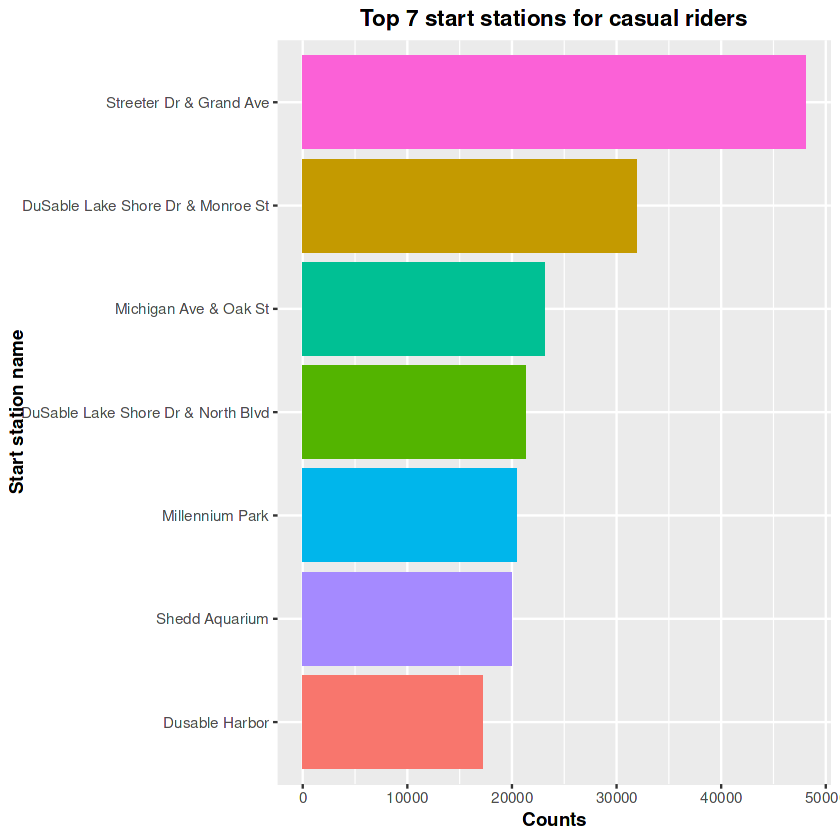

In [45]:
top_start_stations_casual <- data_combined %>%
                             filter(member_casual=='casual') %>%
                             count(start_station_name, sort=TRUE) %>%
                             slice_max(n, n=7)

ggplot(data=top_start_stations_casual) +
    geom_bar(mapping=aes(x=reorder(start_station_name, n), y=n, fill=start_station_name), stat='identity') +
    coord_flip() +
    labs(title='Top 7 start stations for casual riders', x='Start station name', y='Counts') +
    theme(plot.title=element_text(hjust=0.5, face='bold'), axis.title.x=element_text(face='bold'), axis.title.y=element_text(face='bold')) +
    theme(legend.position='none')

# Conclusion

On average the ride length (in seconds) for casual riders is greater. Also casual riders prefer to use Cyclistic bikes on weekends and their preferred hour for riding is 5 in the afternoon. On the other hand, annual members have smaller ride length, increased rides on weekdays and preferred riding hours 8 in the morning and 5 in the afternoon. These patterns show that casual riders use Cyclistic bikes for leisure, while annual members for shorter commutes, likely tied to work or errands.